In [7]:
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns

In [8]:
train_dir='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\train'
test_dir='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\test'
klase=['angry','disgust','fear','happy','neutral','sad','surprise']

br_klasa=len(klase)


In [9]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
                                            rescale=1./255,
                                            horizontal_flip = True,
                                            vertical_flip= True,
                                            width_shift_range = [0.1,0.2],
                                            height_shift_range = [0.1,.2],
                                            validation_split=0.2
)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
                                            rescale=1./255
)

In [10]:
train_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    subset="training",
    seed=11
)

validation_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    seed=11
)

test_batch= test_generator.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


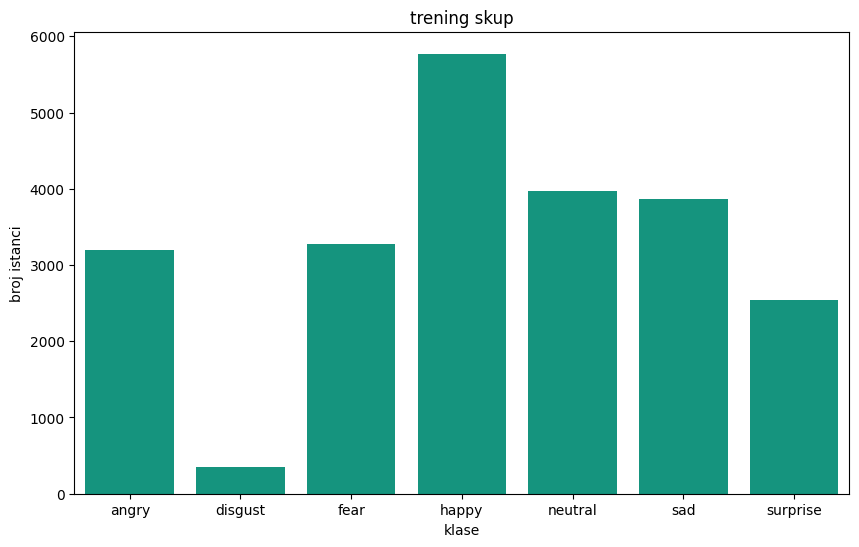

In [17]:
br_po_klasi = train_batch.classes
klasa_oznaka = train_batch.class_indices
po_klasi = [list(br_po_klasi).count(i) for i in range(br_klasa)]

plt.figure(figsize=(10, 6))
sns.barplot(x=klase, y=po_klasi,color="#00A98C")
plt.title('trening skup')
plt.xlabel('klase')
plt.ylabel('broj istanci')
plt.show()

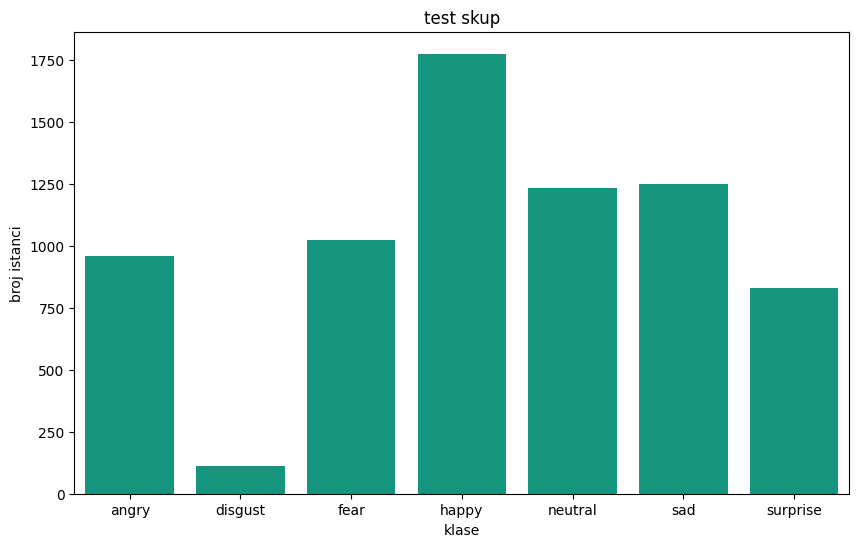

In [18]:
br_po_klasi = test_batch.classes
klasa_oznaka = test_batch.class_indices
po_klasi = [list(br_po_klasi).count(i) for i in range(br_klasa)]


plt.figure(figsize=(10, 6))
sns.barplot(x=klase, y=po_klasi,color="#00A98C")
plt.title('test skup')
plt.xlabel('klase')
plt.ylabel('broj istanci')
plt.show()